# Principal Component Analysis (PCA) – Theory

---

## 1. Definition
Principal Component Analysis (PCA) is an **unsupervised dimensionality reduction technique**.  
It transforms a dataset with possibly correlated features into a set of **linearly uncorrelated variables** called **principal components**, while retaining most of the variance in the data.

---

## 2. Key Idea
- High-dimensional datasets can be **hard to visualize and compute**.  
- PCA reduces the number of dimensions by projecting data onto **principal components** that capture the **maximum variance**.  
- Steps of PCA:
  1. Standardize the data (mean = 0, variance = 1).  
  2. Compute the **covariance matrix** of features.  
  3. Calculate **eigenvectors and eigenvalues** of the covariance matrix.  
  4. Sort eigenvectors by eigenvalues in descending order.  
  5. Select top `k` eigenvectors → project data onto these components.

---

## 3. Applications
- Data visualization (2D/3D plots of high-dimensional data)  
- Noise reduction  
- Feature extraction for machine learning  
- Image compression  

---

## 4. Advantages
- Reduces dimensionality and **computational cost**.  
- Removes **multicollinearity** among features.  
- Helps in **visualizing high-dimensional data**.  

---

## 5. Limitations
- Principal components may be **hard to interpret**.  
- PCA is **linear**; it cannot capture non-linear relationships.  
- Sensitive to **scaling**, so standardization is required.  

---

## 6. Model Training
- PCA is available in `scikit-learn` via `sklearn.decomposition.PCA`.  
- Key parameters:
  - `n_components`: Number of principal components to keep  
  - `whiten`: Scales components to have unit variance  
- After fitting, you can get:
  - `explained_variance_ratio_`: Fraction of variance explained by each component  
  - `components_`: Principal axes in feature space


Explained variance ratio of each component: [0.72962445 0.22850762]


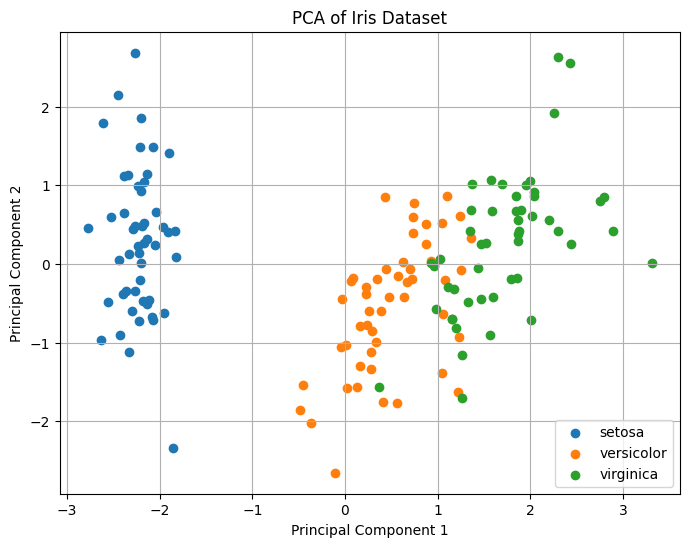

In [1]:
# ==============================
# Principal Component Analysis (PCA)
# ==============================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1. Load dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

# Convert to DataFrame for clarity
data = pd.DataFrame(X, columns=feature_names)
data['target'] = y

# 2. Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. Explained variance
print("Explained variance ratio of each component:", pca.explained_variance_ratio_)

# 5. Create a DataFrame with principal components
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = y

# 6. Visualization of PCA
plt.figure(figsize=(8,6))
for i, target_name in enumerate(target_names):
    plt.scatter(
        pca_df[pca_df['target'] == i]['PC1'],
        pca_df[pca_df['target'] == i]['PC2'],
        label=target_name
    )
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()
